In [88]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [89]:
# Load the dataset
df = pd.read_csv('/content/spam.tsv', sep='\t')

In [90]:
# Display the first few rows of the dataset
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [91]:
# Check for missing values
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [92]:
# Display the last few rows of the dataset
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [93]:
# Display counts of each label
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [94]:
# Sample an equal number of 'ham' and 'spam' records
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [95]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [96]:
ham = ham.sample(spam.shape[0])

In [97]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [98]:
# Concatenate 'ham' and 'spam' to create a balanced dataset
data = ham.append(spam, ignore_index=True)

<ipython-input-98-0bb76705dd9c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


In [99]:
# Display the shape of the balanced dataset
data.shape

(1494, 4)

In [100]:
# Display the first few rows of the balanced dataset
data.head()

,label,message,length,punct
0,ham,In the end she might still vomit but its okay....,76,2
1,ham,Will you be here for food,25,0
2,ham,"Just so that you know,yetunde hasn't sent mone...",244,9
3,ham,Eek that's a lot of time especially since Amer...,103,4
4,ham,Sorry i missed your call. Can you please call ...,51,2


# Visualization the data

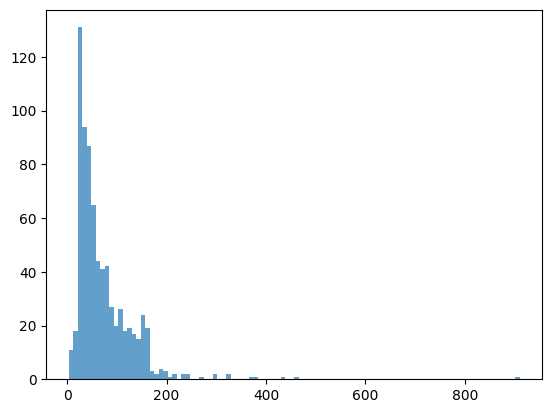

In [101]:
# Plot histograms to visualize the distribution of message lengths for 'ham' and 'spam'
plt.hist(data[data['label']== 'ham']['length'], bins = 100, alpha= 0.7)
plt.show()

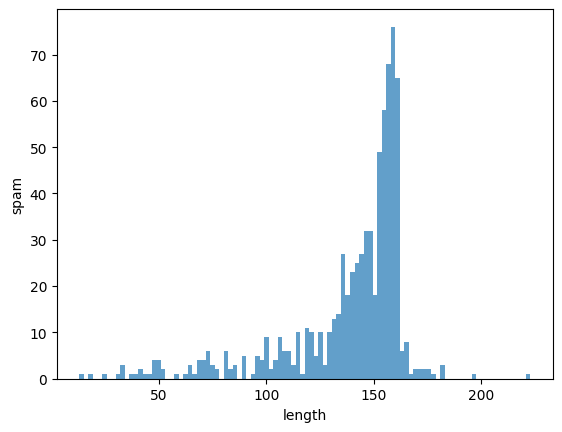

In [102]:
# Plot histograms to visualize the distribution of message lengths for 'ham' and 'spam'
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha=0.7)
plt.xlabel('length')
plt.ylabel('spam')
plt.show()

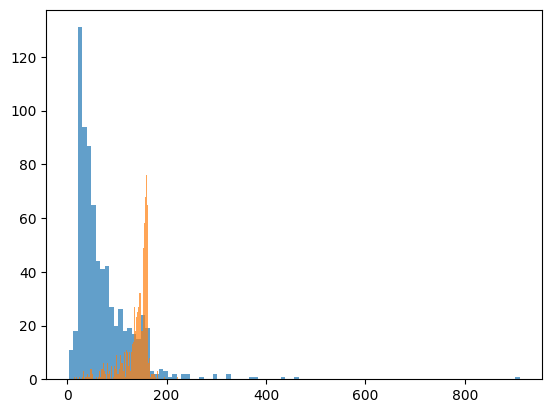

In [103]:
# Plot histograms to visualize the distribution of message lengths for 'ham' and 'spam'
plt.hist(data[data['label']== 'ham']['length'], bins = 100, alpha= 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha=0.7)
plt.show()

# Spam detection with RandomForest Classification

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True)

In [106]:
# Display the shape of the training and testing sets
X_train.shape

(1045,)

In [107]:
X_test.shape

(449,)

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [109]:
# Create a pipeline with TF-IDF vectorizer and Random Forest classifier
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators=10))])

In [110]:
# Fit the model on the training data
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [111]:
# Make predictions on the testing data
y_pred = classifier.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [113]:
# Evaluate the model performance
accuracy_score(y_test, y_pred)

0.9287305122494433

In [114]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 30, 192]])

In [115]:
# Display the evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.88      0.99      0.93       227
        spam       0.99      0.86      0.92       222

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449



# Spam detection with SVM classification

In [116]:
from sklearn.svm import SVC

In [117]:
# Create a pipeline with TF-IDF vectorizer and svm classifier
svm = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', SVC(C=100, gamma='auto'))])

In [118]:
# Fit the model on the training data
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [119]:
# Make predictions on the testing data
y_pred = svm.predict(X_test)

In [120]:
# Evaluate the model performance
accuracy_score(y_test, y_pred)

0.9510022271714922

In [121]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 20, 202]])

In [122]:
# Display the evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



# Testing the Model with three Example

In [123]:
examp_txt1 = ['hello, you won a lottery ticket worth 1$ Million. call the phone number for example 09123']
examp_txt2 = [' dear Eli can you call with the data center and be ready for the interview']
examp_txt3 = ['congratulations MRs Karimi you pass our second interview we will back to you soon.']

In [124]:
print(classifier.predict(examp_txt1))
print(classifier.predict(examp_txt2))
print(classifier.predict(examp_txt3))

['spam']
['ham']
['ham']


In [125]:
print(svm.predict(examp_txt1))
print(svm.predict(examp_txt2))
print(svm.predict(examp_txt3))

['spam']
['ham']
['ham']


In [126]:
!apt-get install -y git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [127]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [135]:
!ls

RandomForestSVM-SpamDetection.ipynb  Untitled0.ipynb  Untitled2.ipynb  Untitled5.ipynb
Speech-to-text.ipynb		     Untitled1.ipynb  Untitled3.ipynb


In [128]:
!git init

Reinitialized existing Git repository in /content/drive/MyDrive/Colab Notebooks/.git/


In [142]:
!git remote add origin https://github.com/elahekarimi/RandomForestSVM-SpamDetection.git


error: remote origin already exists.


In [136]:
!git add RandomForestSVM-SpamDetection.ipynb

In [137]:
!git commit -m "Initial commit"

[main c2ebf4b] Initial commit
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite RandomForestSVM-SpamDetection.ipynb (95%)


In [144]:
!git config --global user.email "elikarimi7019@gmail.com"
!git config --global user.name "Elahe Karimi"
!git config --list

filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
user.email=elikarimi7019@gmail.com
user.name=Elahe Karimi
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/elahekarimi/RandomForestSVM-SpamDetection
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*


In [145]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   RandomForestSVM-SpamDetection.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [146]:
!git add .

In [147]:
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address
